In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#dados = https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent/data

In [2]:
data = pd.read_csv('houses_to_rent_v2.csv')

In [3]:
data.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


In [4]:
data.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [5]:
data.isna().sum() 

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [7]:
data.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [8]:
data.rename(columns = {'rent amount (R$)': 'valor_aluguel'}, inplace=True)
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),valor_aluguel,property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


# Problema: Explorar o valor do aluguel 

Estatística univariada

In [9]:
data['valor_aluguel'].mean()

3896.247194163861

In [10]:
#quando a média é muito maior que a mediana podemos perceber que há outliers nos dados
data['valor_aluguel'].median() 

2661.0

In [11]:
#quando o desvio padrão está perto da média podemos dizer que a dispersão é muito grande nos valores de aluguel
#ou seja, podemos ter valores muito baixos, valores muito altos
data['valor_aluguel'].std()

3408.5455176710816

In [12]:
data['valor_aluguel'].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

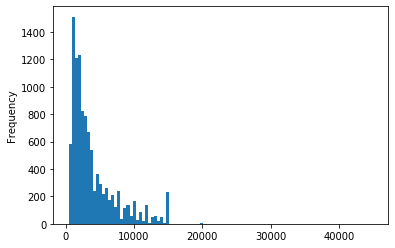

In [13]:
#Podemos perceber que a maioria dos valores estão entre 450,00 e 5.000,00 (min até 75%). E temos alguns 
#outliers a partir de 5.000,00 até 45.000,00 reais.
data['valor_aluguel'].plot(kind='hist', bins=100) #bins: segmentações
plt.show()

In [14]:
data.shape

(10692, 13)

In [15]:
data.valor_aluguel.skew() #posivite skew

1.8388773035440982

In [16]:
data.valor_aluguel.kurtosis() #leptocurtica

4.624228179818687

Exploração multivariáveis

In [ ]:
"""
Apenas para ilustrar a questão da análise exploratória
Perguntas: 
    - Qual a cidade com a média de aluguel mais cara?
    - Quantos banheiros existem nas residências com alugueis mais caros?
    - Os imóveis mais caros aceitam animal?
    - Os imóveis mais caros são mobiliados?
    
Hipóteses:
    - São Paulo é a cidade com o aluguel mais caro.
    - Quanto maior o número de banheiros em um imóvel, maior o valor do aluguel.
    - Os imóveis com mobília tem o aluguel mais caro.
"""

In [17]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),valor_aluguel,property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [18]:
#Qual a cidade com a média de aluguel mais cara?
data.groupby('city')['valor_aluguel'].mean().reset_index().sort_values('valor_aluguel', ascending=False)

,city,valor_aluguel
4,São Paulo,4652.793783
0,Belo Horizonte,3664.127981
3,Rio de Janeiro,3232.904064
1,Campinas,2364.290739
2,Porto Alegre,2337.699916


In [21]:
#Considerando aluguel alto a partir do valor do percentil 75
data['valor_aluguel'].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

In [28]:
#Definição: aluguéis mais altos são valores acima de 5.000,00
data['aluguel_alto'] = ['Alto' if x > 5000 else 'Baixo' for x in data['valor_aluguel']]
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),valor_aluguel,property tax (R$),fire insurance (R$),total (R$),aluguel_alto
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618,Baixo
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973,Baixo
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841,Baixo
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421,Baixo
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836,Baixo


In [29]:
data['aluguel_alto'].value_counts()

Baixo    8153
Alto     2539
Name: aluguel_alto, dtype: int64

In [30]:
#Quantos banheiros existem nas residências com alugueis mais caros?
data.groupby('aluguel_alto')['bathroom'].mean()

aluguel_alto
Alto     3.729027
Baixo    1.772108
Name: bathroom, dtype: float64

In [31]:
#Os imóveis mais caros aceitam animal?
data.groupby('aluguel_alto')['animal'].value_counts()

aluguel_alto  animal   
Alto          acept        2084
              not acept     455
Baixo         acept        6232
              not acept    1921
Name: animal, dtype: int64

In [32]:
#Os imóveis mais caros são mobiliados?
data.groupby('aluguel_alto')['furniture'].value_counts()

aluguel_alto  furniture    
Alto          not furnished    1661
              furnished         878
Baixo         not furnished    6425
              furnished        1728
Name: furniture, dtype: int64

In [35]:
data[['valor_aluguel', 'bathroom']].corr(method='spearman')

,valor_aluguel,bathroom
valor_aluguel,1.00000,0.71589
bathroom,0.71589,1.00000


In [36]:
aux = pd.DataFrame({'colunas': data.columns, 'tipos': data.dtypes})
aux

,colunas,tipos
city,city,object
area,area,int64
rooms,rooms,int64
bathroom,bathroom,int64
parking spaces,parking spaces,int64
floor,floor,object
animal,animal,object
furniture,furniture,object
hoa (R$),hoa (R$),int64
valor_aluguel,valor_aluguel,int64


In [38]:
lista = list(aux[aux['tipos'] == 'int64']['colunas'])
for coluna in lista:
    print(coluna)
    print(data[['valor_aluguel', coluna]].corr(method='spearman'))

area
               valor_aluguel      area
valor_aluguel       1.000000  0.728095
area                0.728095  1.000000
rooms
               valor_aluguel     rooms
valor_aluguel       1.000000  0.600969
rooms               0.600969  1.000000
bathroom
               valor_aluguel  bathroom
valor_aluguel        1.00000   0.71589
bathroom             0.71589   1.00000
parking spaces
                valor_aluguel  parking spaces
valor_aluguel        1.000000        0.620175
parking spaces       0.620175        1.000000
hoa (R$)
               valor_aluguel  hoa (R$)
valor_aluguel       1.000000  0.355785
hoa (R$)            0.355785  1.000000
valor_aluguel
               valor_aluguel  valor_aluguel
valor_aluguel            1.0            1.0
valor_aluguel            1.0            1.0
property tax (R$)
                   valor_aluguel  property tax (R$)
valor_aluguel            1.00000            0.65923
property tax (R$)        0.65923            1.00000
fire insurance (R$)
          

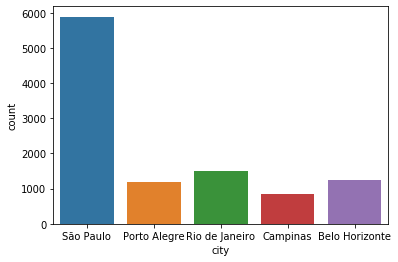

In [40]:
#data.city.value_counts()
sns.countplot(x='city', data=data)
plt.show()

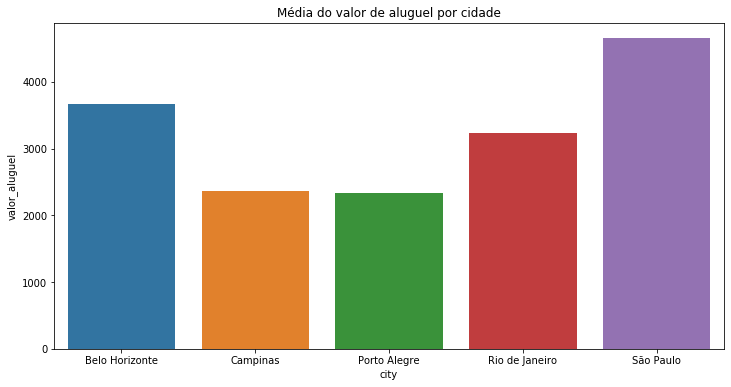

In [48]:
plt.figure(figsize=(12,6))
sns.barplot(x='city', y='valor_aluguel', data=data.groupby('city')['valor_aluguel'].mean().reset_index())
plt.title('Média do valor de aluguel por cidade')
plt.show()

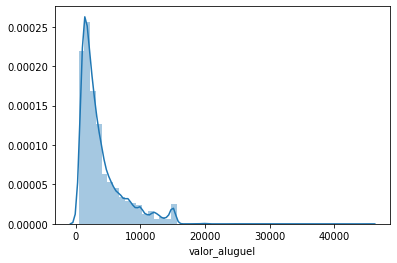

In [49]:
sns.distplot(data['valor_aluguel'])
plt.show()

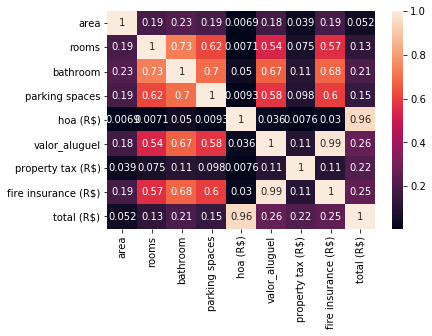

In [52]:
sns.heatmap(data.corr(), annot=True)
plt.show()

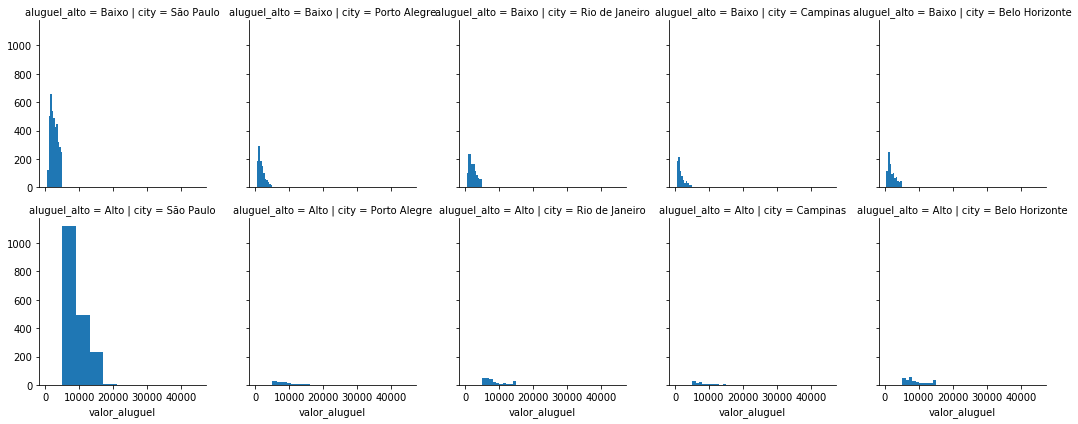

In [56]:
g = sns.FacetGrid(data, col='city', row='aluguel_alto')
g = g.map(plt.hist, 'valor_aluguel')
plt.show()